<a href="https://colab.research.google.com/github/neilplus21/fer2013_dl/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kagglehub --quiet

In [ ]:
import kagglehub

# Pull the dataset — it'll be downloaded to `/root/.kagglehub/datasets/msambare/fer2013`
basedir = kagglehub.dataset_download('msambare/fer2013')


In [ ]:
import kagglehub
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_dir = f'{basedir}/train'
val_dir = f'{basedir}/test'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (48, 48)
batch_size = 32

train_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    train_dir, target_size=img_size, color_mode='grayscale',
    batch_size=batch_size, class_mode='categorical', shuffle=True)

val_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    val_dir, target_size=img_size, color_mode='grayscale',
    batch_size=batch_size, class_mode='categorical', shuffle=False)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam, RMSprop, SGD

def build_cnn_model(learning_rate=0.0001, dropout_rate=0.3, optimizer_name='adam', dense_layers = 2):
    model = Sequential()

    # Block 1
    model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(48,48,1)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(dropout_rate))

    # Block 2
    model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(dropout_rate))

    # Block 3 (optional)
    model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(dropout_rate))

    # Dense
    # Dense layers
    model.add(Flatten())
    for _ in range(dense_layers):
        model.add(Dense(128, activation='relu'))
        model.add(Dropout(dropout_rate))
    model.add(Dense(7, activation='softmax'))  # 7 classes


    # Optimizer selection
    optimizer_name = optimizer_name.lower()
    if optimizer_name == 'adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer_name == 'rmsprop':
        optimizer = RMSprop(learning_rate=learning_rate)
    elif optimizer_name == 'sgd':
        optimizer = SGD(learning_rate=learning_rate, momentum=0.9)
    else:
        raise ValueError(f"Unsupported optimizer: {optimizer_name}")

    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model


In [ ]:
learning_rate = 0.0001
optimizer_name = 'adam'
dropout_rate = 0.3
dense_layers = 2

In [ ]:
model = build_cnn_model(
    learning_rate=learning_rate,
    optimizer_name=optimizer_name,
    dropout_rate=dropout_rate,
    dense_layers=dense_layers
)

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=15,
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 228s 250ms/step - accuracy: 0.2052 - loss: 2.0832 - val_accuracy: 0.2824 - val_loss: 1.7859
Epoch 2/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 219s 244ms/step - accuracy: 0.2543 - loss: 1.8116 - val_accuracy: 0.3312 - val_loss: 1.6796
Epoch 3/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 214s 238ms/step - accuracy: 0.2950 - loss: 1.7480 - val_accuracy: 0.3704 - val_loss: 1.6105
Epoch 4/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 214s 238ms/step - accuracy: 0.3223 - loss: 1.6845 - val_accuracy: 0.3920 - val_loss: 1.5513
Epoch 5/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 268s 245ms/step - accuracy: 0.3513 - loss: 1.6392 - val_accuracy: 0.3899 - val_loss: 1.5704
Epoch 6/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 223s 248ms/step - accuracy: 0.3670 - loss: 1.5993 - val_accuracy: 0.4287 - val_loss: 1.4715
Epoch 7/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 231s 257ms/step - accuracy: 0.3808 - loss: 1.5748 - val_accuracy: 0.4296 - val_loss: 1.4855
Epoch 8/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 222s 248ms/step - accuracy: 0.3988 -

225/225 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step


<Figure size 1000x800 with 0 Axes>

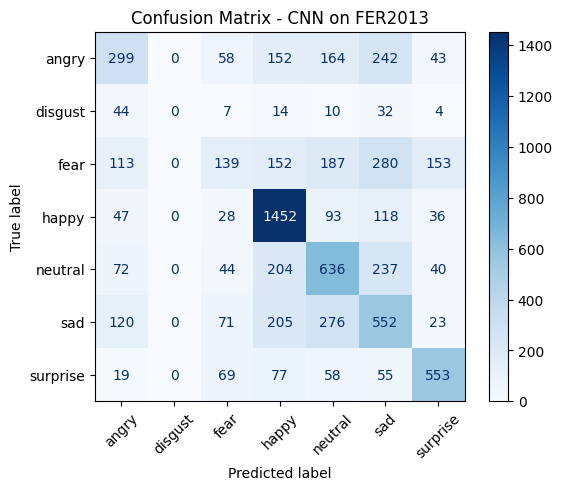

In [ ]:
class_names = list(val_gen.class_indices.keys())

import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Get predictions
Y_pred = model.predict(val_gen, steps=val_gen.samples // batch_size + 1)
y_pred = np.argmax(Y_pred, axis=1)

# True labels
y_true = val_gen.classes[:len(y_pred)]  # trim to prediction size

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Plot
plt.figure(figsize=(10, 8))
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix - CNN on FER2013")
plt.show()


plot_history(
    history,
    learning_rate=0.001,
    optimizer='Adam',
    batch_size=32,
    dropout=0.5,
    dense_layers=2,
    save_plot=  # Optional
)

In [ ]:
from google.colab import drive
import os

# 1. Mount your Drive
drive._mount('/content/drive')

# 2. Make a folder for your models (if you haven’t already)
drive_model_dir = '/content/drive/MyDrive/saved_models'
os.makedirs(drive_model_dir, exist_ok=True)

# 3. Save your CNN model (replace `model` with whatever your variable is)
model.save(os.path.join(drive_model_dir, 'cnn_model_4.h5'))

print(f"CNN model saved to {drive_model_dir}/cnn_model_4.h5")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
CNN model saved to /content/drive/MyDrive/saved_models/cnn_model_4.h5
